In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns
from numpy import median

## Data reading & munging
### Identify columns with missing values, discard features with significant missing values; Impute values for the rest.

### Read datset. Identifying na records & handling

In [4]:
data = pd.read_csv(r"C:\Users\HP\Documents\DataScience\Python Scripts\Iowa Housing\train1.csv")

Col_NA = {}
Cols = data.columns
for col in Cols:
    na_count = data[col].isnull().sum()
    Col_NA[col] = na_count

Col_Drop =[]

for key, value in Col_NA.items():
    val = value/data[key].count()
    if val > 0.3:
        key = str(key)
        Col_Drop.append(key)  

print("Features with significant missing values are: {}".format(Col_Drop))
        
Col_fill =[]
for key, value in Col_NA.items():
    val = value/data[key].count()
    if val < 0.3:
        if val > 0:
            Col_fill.append(key)

print("Features with missing values to be filled are: {}".format(Col_fill))

data1 = data
for col_d in Col_Drop:
    del data1[col_d]

data2 = data1.apply(lambda x:x.fillna(x.value_counts().index[0]))

Features with significant missing values are: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Features with missing values to be filled are: ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


## A Look at the data
### Statistical - Central tendency, Dispersion, Correlation
Central Tendency & Dispersion provided by describe() - Mean, Median, Min, Perentiles (25, 50, 75), Max for numeric features.

In [3]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [5]:
data2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,67.404110,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.773024,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Analyze correlation 
Correlation matrix below provides pearson correlation coefficient value for every variable (numeric) pair. 
Further, we bring out those features that have pearson coeff greater than 0.2. This provides an interesting insight that 19 Features out of the 38 numeric features (printed below) have strong correlation with SalePrice. But, this view may not be accurate due to potential distortion due to multicollinearity, if any. 

In [5]:
num_Col = []
for col in data2.columns:
    if data2[col].dtype != 'O':
        num_Col.append(col)
data_num = data2[num_Col]
corr_df = pd.DataFrame()
corr_df = data_num.corr()
corr_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.045302,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.318503,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,0.045302,-0.318503,1.000000,0.261947,0.227885,-0.062296,0.098942,0.091102,0.160471,0.186872,...,0.044841,0.113682,0.005598,0.050934,0.033352,0.169887,-0.016133,0.013789,-0.012619,0.315862
LotArea,-0.033226,-0.139781,0.261947,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.227885,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.062296,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.098942,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.091102,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.160471,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.186872,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [17]:
Num_Features = list(data_num)
Num_Features.remove('SalePrice')
Corr_Dict={}
for col in Num_Features:
    val = data_num[col].corr(data_num['SalePrice']) 
    if val > 0.3:
        Corr_Dict[col] = val
print(Corr_Dict)

{'LotFrontage': 0.31586193352009567, 'OverallQual': 0.79098160058380496, 'YearBuilt': 0.52289733287949702, 'YearRemodAdd': 0.5071009671113863, 'MasVnrArea': 0.47261449900457386, 'BsmtFinSF1': 0.38641980624215327, 'TotalBsmtSF': 0.61358055155919555, '1stFlrSF': 0.60585218469191471, '2ndFlrSF': 0.31933380283206786, 'GrLivArea': 0.70862447761265224, 'FullBath': 0.56066376274844609, 'TotRmsAbvGrd': 0.53372315558202832, 'Fireplaces': 0.46692883675152769, 'GarageYrBlt': 0.39777804148697804, 'GarageCars': 0.64040919725835221, 'GarageArea': 0.62343143891836195, 'WoodDeckSF': 0.32441344456812998, 'OpenPorchSF': 0.31585622711605538}


## Visual EDA



### Univariate Analysis
Histogram with/out kde of Target i.e SalePrice.
Distribution is not standard normal, but approximately normal. It is left skewed.
Boxplot shows the min, max, Q1, Q3 and mean. Also shows the outliers i.e prices above $340000. 

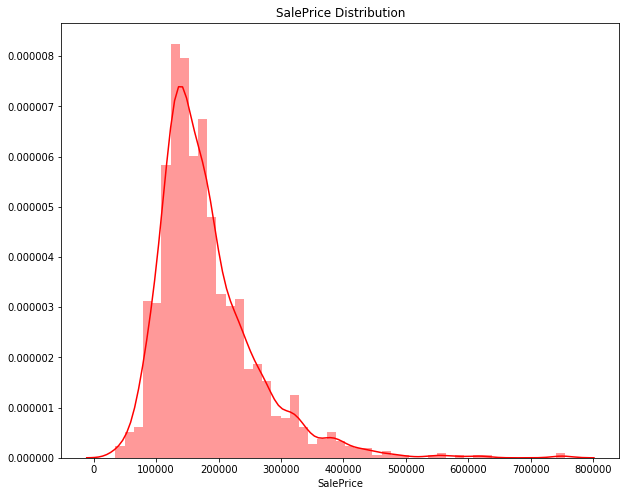

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('SalePrice Distribution')
ax = sns.distplot(data2.SalePrice, kde=True, color='r')
plt.show()

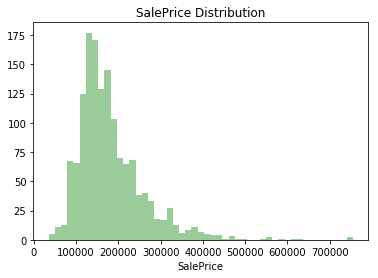

In [22]:
ax = sns.distplot(data2.SalePrice, kde=False, color='g').set_title('SalePrice Distribution')
plt.show()

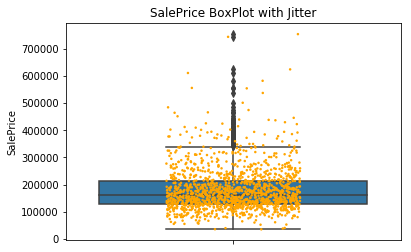

In [21]:
ax = sns.boxplot(y=data2["SalePrice"], fliersize=5)
ax = sns.stripplot(y='SalePrice', data=data2, color="orange", jitter=0.2, size=2.5).set_title('SalePrice BoxPlot with Jitter')
plt.show()

### Bivariate & multivariate Analysis

#### Segmented Boxplots: 
Segmented Boxplot with separate boxplot of Saleprice segmented by various qualitative features such as LotShape provides further compartive insight - though the individual boxplot is still univariate, the segmented boxplot brings in bivariate aspect by virtue of this comparitive insight. 

Examples: 
A. '2 Story' houses have broadest SalePrice distribution  while '1.5Unf' houses have the least. 
B. The median of '2 Story' houses is 2nd highest among the house styles and also has the most number of outliers. 

Furthermore, we throw in 'LotShape' into the mix in the next plot and get more insight. 
A. '2 Story' housese have nearly similar distribution among the LotShapes but '2.5Fin' and '1.5UNF' have only one style i.e Regular - this is interesting because these houses can be upgraded to '2 story', so the lack of irregular shapes does sound interesting! 

Similarly when 'LotConfig' is brought in, we can see that 
A. 'FR3' config i.e plots with two sides frontage occur only in '1 story' or '2 story' houses. 
The median and max values of FR3 config is highest within '2 story' houses which is understandable as they are expected to command higher price. Similarly, CulDSac config has higher median and max values. 
 

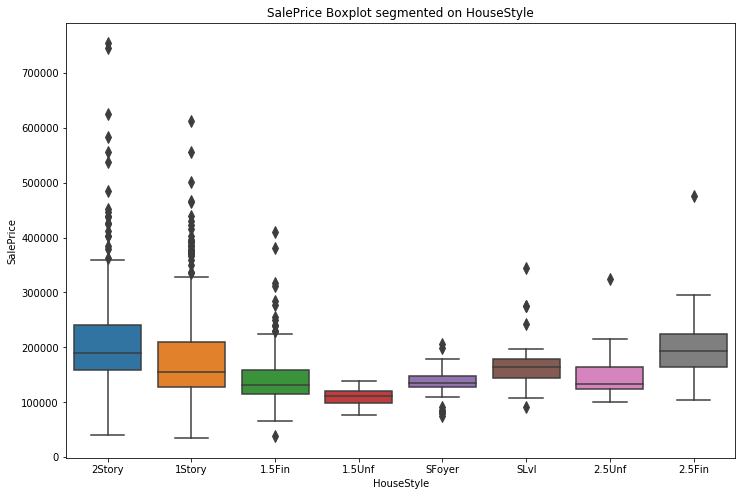

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="HouseStyle", y="SalePrice", data=data2, fliersize=8).set_title('SalePrice Boxplot segmented on HouseStyle')
plt.show()

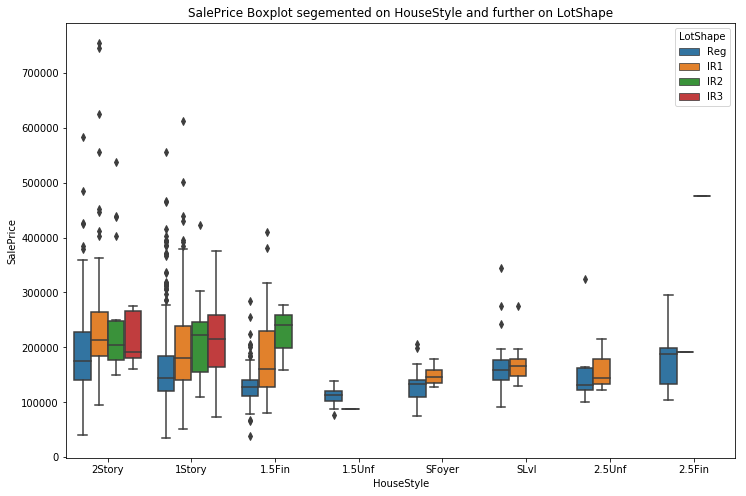

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="HouseStyle", y="SalePrice", hue="LotShape", data=data2).set_title('SalePrice Boxplot segemented on HouseStyle and further on LotShape')
plt.show()
plt.show()

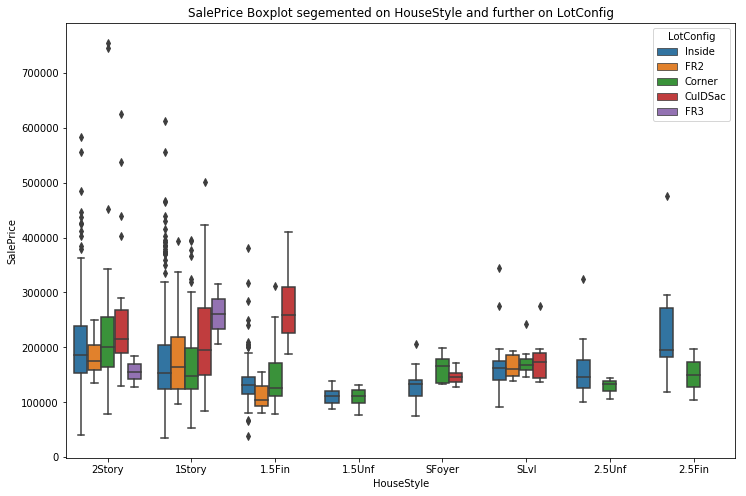

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="HouseStyle", y="SalePrice", hue="LotConfig", data=data2).set_title('SalePrice Boxplot segemented on HouseStyle and further on LotConfig')
plt.show()
plt.show()

#### Countplot & Barplot: 
Countplot across various qualitative features bring out the distribution of Sale data across these features. 
Sample Insights: 
A. 'Regular' lotshape dominates the dataset with more counts than other shapes put together. 
B. IR1 has about half the count while IR2 has about a fifth of IR1. IR3 has very few counts. 

Further, another qualitative variable, say LotConfig can be thrown which reveals that:
A. 'Inside' config dominates across Shapes - also 'CulDSac' config dominates only in IR1 shape. 

Further Barplot on SalePrice across LotShape shows that:
A. 'Reg' shape the least mean price though it has the highest count (via Countplot!). Inference may be that Regular plots are cheaper and hence command most volume !

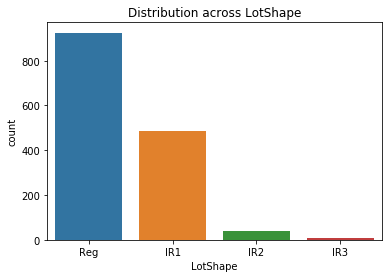

In [28]:
ax = sns.countplot(x="LotShape", data=data2).set_title('Distribution across LotShape')
plt.show()

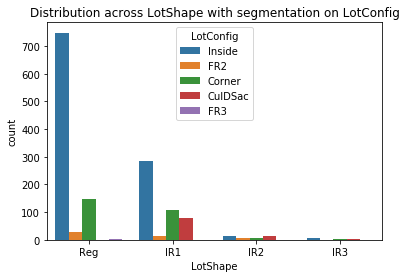

In [29]:
ax = sns.countplot(x="LotShape", hue="LotConfig", data=data2).set_title('Distribution across LotShape with segmentation on LotConfig')
plt.show()

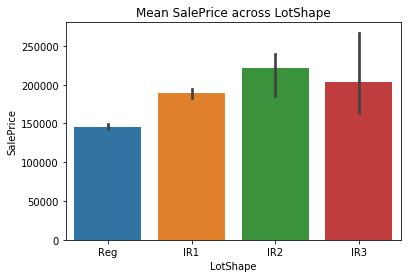

In [34]:
ax = sns.barplot(x="LotShape", y="SalePrice", data=data2, estimator=median).set_title('Mean SalePrice across LotShape')
plt.show()

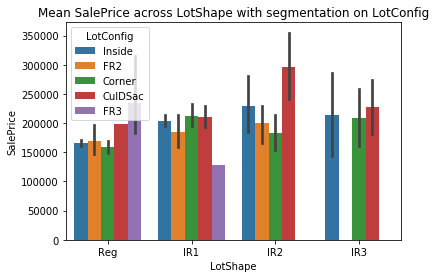

In [35]:
ax = sns.barplot(x="LotShape", y="SalePrice", hue="LotConfig", data=data2).set_title('Mean SalePrice across LotShape with segmentation on LotConfig')
plt.show()

In [14]:
ax = sns.pairplot(data_num)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### LINEPLOT:
SalePrice is plotted against YrSold which is a timeseries plot. 

A. SalePrice has decreased overall during the period (2006-2010). But it has not been a continuos decrease. 
B. Price has increased from 2006 to reach a peak in 2007 and then crashed to a low in 2008 to gain back partially in 2009 and further loose some steam in 2010. 
C. It is possible that the low of 2008 corresponds the economic crisis of 2008! 

Further, we add in LotShape to this Lineplot. There is some insight:

A. Price of IR3 shape has been most volatile while Reg and IR1 have been most stable - these trends belie the story told by the overall Lineplot!! Furthermore, another qualitiative variable (say LotConfig) can be thrown in (as a hue). 

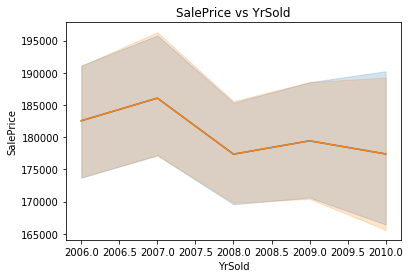

In [41]:
ax = sns.lineplot(x="YrSold", y="SalePrice", data=data2).set_title('SalePrice vs YrSold')
plt.show()

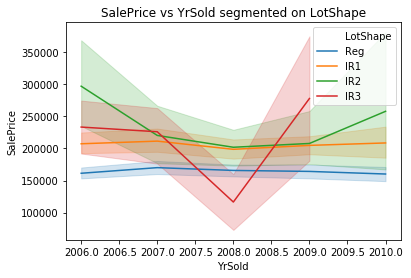

In [42]:
ax = sns.lineplot(x="YrSold", y="SalePrice", hue ='LotShape', data=data2).set_title('SalePrice vs YrSold segmented on LotShape')
plt.show()

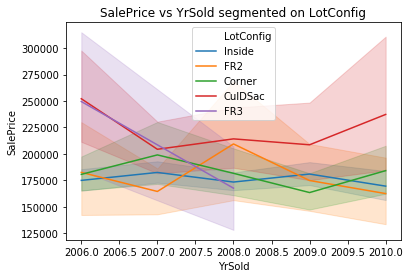

In [43]:
ax = sns.lineplot(x="YrSold", y="SalePrice", hue ='LotConfig', data=data2).set_title('SalePrice vs YrSold segmented on LotConfig')
plt.show()

#### SCATTERPLOT:
Pairplot did not work due to the size of varaible matrix. But individual scatter plots worked. For example, scatter plots of LotArea vs SalePrice and LotConfig vs SalePrice does not show any interesting pattern or insight.

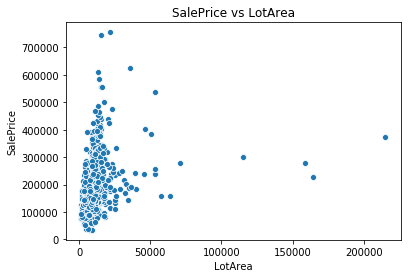

In [44]:
ax = sns.scatterplot(x="LotArea", y="SalePrice", data=data2).set_title('SalePrice vs LotArea')
plt.show()

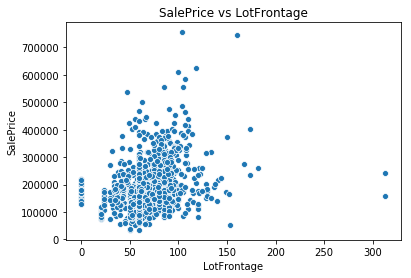

In [45]:
ax = sns.scatterplot(x="LotFrontage", y="SalePrice", data=data2).set_title('SalePrice vs LotFrontage')
plt.show()

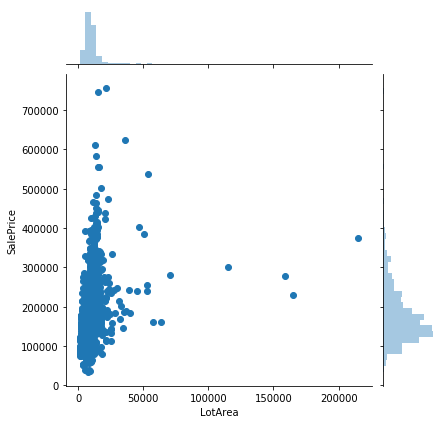

In [46]:
ay = sns.jointplot(x="LotArea", y="SalePrice", data=data2)
plt.show()